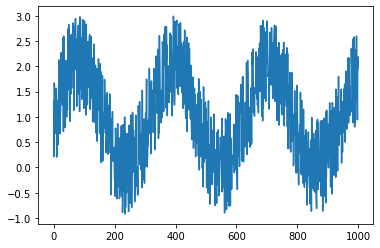

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 - 3s - loss: 1.1345 - 3s/epoch - 66ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4104 - 261ms/epoch - 5ms/step
Epoch 3/100
50/50 - 0s - loss: 0.3977 - 345ms/epoch - 7ms/step
Epoch 4/100
50/50 - 0s - loss: 0.3913 - 311ms/epoch - 6ms/step
Epoch 5/100
50/50 - 0s - loss: 0.3873 - 281ms/epoch - 6ms/step
Epo

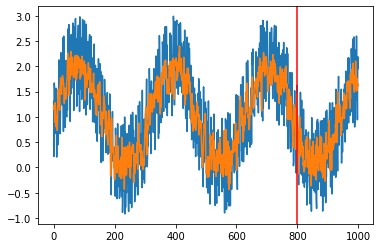

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [7]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

In [8]:
step = 4
N = 1000    
Tp = 800    

In [9]:
t=np.arange(0,N)
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
x=np.sin(0.02*t)+2*np.random.rand(N)
x

array([ 3.14279757e-02,  1.18226179e+00,  1.67359829e+00,  5.93322338e-01,
        6.40874252e-01,  1.99876201e+00,  1.71907820e+00,  1.80991533e+00,
        1.72648621e+00,  6.89498413e-01,  4.15121587e-01,  1.00120888e+00,
        4.45104869e-01,  5.00783048e-01,  7.98336528e-01,  1.79362269e+00,
        8.11483292e-01,  6.79895201e-01,  3.70006517e-01,  1.93004077e+00,
        1.65218270e+00,  2.18932636e+00,  1.02020614e+00,  9.28676496e-01,
        1.22373197e+00,  9.40370756e-01,  8.14839190e-01,  1.17023119e+00,
        1.13770274e+00,  1.76174337e+00,  1.97825166e+00,  9.06742698e-01,
        1.64612294e+00,  1.37691051e+00,  1.72181907e+00,  7.72926956e-01,
        9.65077315e-01,  8.12757411e-01,  2.02192767e+00,  2.29883291e+00,
        1.79809395e+00,  1.42111850e+00,  1.48008665e+00,  1.86820887e+00,
        2.45288919e+00,  1.27661652e+00,  1.26465050e+00,  1.61680500e+00,
        1.34123468e+00,  1.72716441e+00,  2.81246595e+00,  1.85886961e+00,
        2.40145119e+00,  

In [11]:
df = pd.DataFrame(x)
df.head()

,0
0,0.031428
1,1.182262
2,1.673598
3,0.593322
4,0.640874


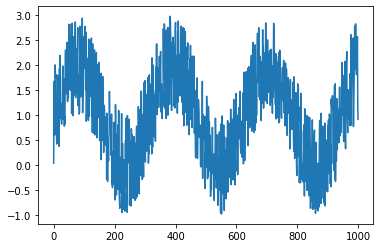

In [12]:
plt.plot(df)
plt.show()

In [13]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [16]:
len(values)

1000

In [17]:
len(train)

800

In [18]:
len(test)

200

In [19]:
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [22]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
trainX

array([[[ 0.03142798,  1.18226179,  1.67359829,  0.59332234]],

       [[ 1.18226179,  1.67359829,  0.59332234,  0.64087425]],

       [[ 1.67359829,  0.59332234,  0.64087425,  1.99876201]],

       ...,

       [[ 0.02417516, -0.21574359,  1.38425441,  1.38425441]],

       [[-0.21574359,  1.38425441,  1.38425441,  1.38425441]],

       [[ 1.38425441,  1.38425441,  1.38425441,  1.38425441]]])

In [24]:
model = Sequential()

In [25]:
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))

In [26]:
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)

Epoch 1/100
50/50 - 2s - loss: 2.1542 - 2s/epoch - 34ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4898 - 222ms/epoch - 4ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4034 - 143ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 0.3918 - 129ms/epoch - 3ms/step
Epoch 5/100
50/50 - 0s - loss: 0.3880 - 83ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.3839 - 85ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.3855 - 83ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.3832 - 90ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3834 - 85ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3835 - 80ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3811 - 83ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3820 - 94ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3798 - 85ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3799 - 80ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3789 - 88ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3799 - 86ms/epoch - 2ms/step

In [28]:
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.35180771350860596


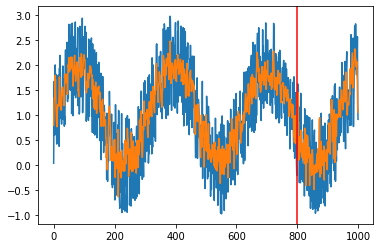

In [29]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

In [40]:
import pandas as pd
import tensorflow as tf


inputs = pd.DataFrame(data={"Week_no": [1,2, 3, 4, 5, 6],
                        "Feature_1": [1, 2, 3, 4, 5, 6],
                        "Feature_2": [1, 2, 3, 4, 5, 6],
                        "Feature_3": [1, 2, 3, 4, 5, 6],
                        "Feature_4": [1, 2, 3, 4, 5, 6],
                        "Feature_5": [1, 2, 3, 4, 5, 6],
                        "Target": [1, 2, 3, 4, 5, 6]})

n = len(inputs)

train_df = inputs[0:int(n*0.7)].drop(columns = ['Target', 'Week_no'])
train_ans = inputs[0:int(n*0.7)]['Target']

test_df = inputs[int(n*0.7):].drop(columns = ['Target', 'Week_no'])
test_ans = inputs[int(n*0.7):]['Target']

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(5, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(5, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(train_df.to_numpy()[..., None], train_ans, epochs=20)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 11.4178
Epoch 2/20
1/1 [==============================] - 0s 14ms/step - loss: 11.2933
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 11.1617
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 11.0224
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 10.8751
Epoch 6/20
1/1 [==============================] - 0s 14ms/step - loss: 10.7198
Epoch 7/20
1/1 [==============================] - 0s 15ms/step - loss: 10.5574
Epoch 8/20
1/1 [==============================] - 0s 16ms/step - loss: 10.3886
Epoch 9/20
1/1 [==============================] - 0s 13ms/step - loss: 10.2145
Epoch 10/20
1/1 [==============================] - 0s 15ms/step - loss: 10.0357
Epoch 11/20
1/1 [==============================] - 0s 16ms/step - loss: 9.8523
Epoch 12/20
1/1 [==============================] - 0s 17ms/step - loss: 9.6636
Epoch 13/20
1/1 [==============================] - 0s

In [36]:
test_ans

4    5
5    6
Name: Target, dtype: int64

In [37]:
PredictX = model.predict(test_df)

1/1 [==============================] - 0s 25ms/step


In [38]:
PredictX

array([[-0.6273601],
       [-0.7237637]], dtype=float32)